# CNN Exercise - Deep Learning for Computer Vision
__Introduction:__

Deep neural networks have tremendous potential to learn complex non-linear functions, patterns, and representations. This includes real-world applications like image categorization and classification and the very popular concept of image artistic style transfer. Computer vision is all about the art and science of making machines understand high-level useful patterns and representations from images and videos so that it would be able to make intelligent decisions similar to what a human would do upon observing its surroundings. 

Convolutional neural networks or CNNs are extensively used for automated feature extraction in images.  In fact, CNNs are similar to the general deep neural networks, but with explicit assumption of input being a data set where which the location of a feature is relevant can be attempted via CNNs  like image, but not limited to then. Others examples are:
- ***Time series***: your data is well ordered. A time series problem would make a 1–d convolution the right choice.
- ***Weather***: Build a map of current weather conditions (location-based values, but not actual images). Add another dimension to it for the previous weather maps (in order) and you have a 4–d convolution problem to predict the weather.

This notebook explore convolutional neural networks through the task of image classification using publicly dataset  CIFAR-10. We will utilize our understanding of CNNs to then take on the task of style transfer and understand how neural networks can be used to understand high-level features. Through this notebook, we cover the following topics:
- Image classification use CNNs from scratch
- Transfer learning: image classification using pretrained models
- Neural style transfer using CNNs

For an in-depth understanding of CNNs applied for visual recognition take look on the [Stanford course material](http://cs231n.github.io/convolutional-networks). Let us see a little brief overview of its key concepts:
- ***A CNN is made up of Layers***: Every Layer has a simple API: It transforms an input 3D volume to an output 3D volume with some differentiable function that may or may not have parameters. the main layers are:
    - ***Convolutional Layer***: Is a set of slides or convolves learnable filters, also known as kernels or convolution matrix, to help capture spatial features. These cover the width, height and the full depth (color range) of the image. During the forward pass, we slide the filter across the width and the height of the image while computing the dot product between the filter attributes and the input at any position. The output is a two-dimensional activation map from each filter, which are then stacked to get the final output.
    - ***Pooling Layer***: These are basically down-sampling layers used to reduce spatial size and number of parameters by apply functions such as max, average, L2-norm, and so on. These layers also help in controlling overfitting.  These layers are insert in between conv layers or in the end of a sequence of them.
    - ***Fully Connected Layer***: This layer helps perform the tasks of classification. It is similar to fully connected layers in general neural networks. These have full connections to all neurons in the previous layer and can followed by a Dropout to help to reduce overfit.<p>
- ***Parameter Sharing***: Conv layers use same set of weights across the filters thus reducing the overall number of parameters required.

CNNs have gone through tremendous research and advancements have led to more complex and power architectures, like VGG-16, VGG-19, Inception V3, and many models that are more interesting.

Let's start our studies:
![image](http://cs231n.github.io/assets/cnn/convnet.jpeg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-environment-and-uploading-data" data-toc-modified-id="Preparing-environment-and-uploading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing environment and uploading data</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li></ul></li><li><span><a href="#Load-and-Prepare-Data" data-toc-modified-id="Load-and-Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#Prepare-the-target-variable" data-toc-modified-id="Prepare-the-target-variable-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prepare the target variable</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Augmentation</a></span></li><li><span><a href="#Set-Global-Variables-and-Seed" data-toc-modified-id="Set-Global-Variables-and-Seed-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Set Global Variables and Seed</a></span></li></ul></li><li><span><a href="#Image-Multiclassifier-using-CNNs-from-scratch" data-toc-modified-id="Image-Multiclassifier-using-CNNs-from-scratch-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Image Multiclassifier using CNNs from scratch</a></span><ul class="toc-item"><li><span><a href="#Create-the-CNN-Model" data-toc-modified-id="Create-the-CNN-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create the CNN Model</a></span></li><li><span><a href="#Visualize-the-network-architecture" data-toc-modified-id="Visualize-the-network-architecture-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visualize the network architecture</a></span></li><li><span><a href="#Final-evaluation-of-the-model" data-toc-modified-id="Final-evaluation-of-the-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Final evaluation of the model</a></span></li><li><span><a href="#Predict-class-of-image-in-practice" data-toc-modified-id="Predict-class-of-image-in-practice-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Predict class of image in practice</a></span></li><li><span><a href="#Model-Interpretation" data-toc-modified-id="Model-Interpretation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Model Interpretation</a></span></li></ul></li><li><span><a href="#CNN-with-Pre-Trained-Models" data-toc-modified-id="CNN-with-Pre-Trained-Models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CNN with Pre-Trained Models</a></span><ul class="toc-item"><li><span><a href="#Create-The-Model-by-a-Pre-Trained-Model" data-toc-modified-id="Create-The-Model-by-a-Pre-Trained-Model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create The Model by a Pre-Trained Model</a></span></li><li><span><a href="#Final-evaluation-of-the-model" data-toc-modified-id="Final-evaluation-of-the-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Final evaluation of the model</a></span></li><li><span><a href="#Predict-class-of-image-in-CNN-Pre-Trained-Classifier" data-toc-modified-id="Predict-class-of-image-in-CNN-Pre-Trained-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Predict class of image in CNN Pre-Trained Classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Preparing environment and uploading data
You can download the this python notebook and data from my [github repository](https://github.com/mgmarques/Studies-on-Kaggle). The data can download on Kaggle [here](https://www.kaggle.com/sgazer/cifar10batchespy/downloads/cifar10batchespy.zip/1).

### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import pylab 
from PIL import Image
from IPython.display import SVG
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

%matplotlib inline
'''
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
'''

import math
import timeit
from six.moves import cPickle as pickle
import platform
#from subprocess import check_output
import glob

import tensorflow as tf
import keras
from keras.constraints import maxnorm
#from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.utils.np_utils import to_categorical   
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from tqdm import tqdm_notebook
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

Using TensorFlow backend.


Set the GPU for use and check if it successful activate.

In [2]:
use_gpu = torch.cuda.is_available()
use_gpu

True

## Load and Prepare Data
The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images divided into five training batches and one test batch, each with 10000 images. . 

The dataset was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton and is available at [cs.totonto.edu](https://www.cs.toronto.edu/~kriz/cifar.html) as well as through the datasets module in keras through the keras.datasets module.

Similar to any Machine Learning algorithm, neural networks also require the input data to be certain shape, size, and type. Therefore, before we reach the modeling step, the first thing is to preprocess the data itself. The following snippet gets the datasets from the different batches files. First, each file need to be unpickled, then the independent variables and dependent variable are separate, next the dependent variables are separated in their respective colors channels and reshape according the size of the image, then the data are converted to a numpy array and transpose to reorganize the data from 3,32,32 to 32,32,3. Finally, the data is append to can used as a unique dataset.

In [3]:
def unpickle(fname):
    with open(fname, "rb") as f:
        result = pickle.load(f, encoding='bytes')
    return result

def getData():
    labels_training = []
    dataImgSet_training = []
    labels_test = []
    dataImgSet_test = []

    # use "data_batch_*" for just the training set
    for fname in glob.glob("../input/cifar-10-batches-py/*data_batch*"):
        print("Getting data from:", fname)
        data = unpickle(fname)

        for i in range(10000):
            img_flat = data[b"data"][i]
            #fname = data[b"filenames"][i]
            labels_training.append(data[b"labels"][i])

            # consecutive 1024 entries store color channels of 32x32 image 
            img_R = img_flat[0:1024].reshape((32, 32))
            img_G = img_flat[1024:2048].reshape((32, 32))
            img_B = img_flat[2048:3072].reshape((32, 32))
            
            imgFormat = np.array([img_R, img_G, img_B])
            imgFormat = np.transpose(imgFormat, (1, 2, 0))  #Change the shape 3,32,32 to 32,32,3 
            dataImgSet_training.append(imgFormat)
            
    # use "test_batch_*" for just the test set
    for fname in glob.glob("../input/cifar-10-batches-py/*test_batch*"):
        print("Getting data from:", fname)
        data = unpickle(fname)

        for i in range(10000):
            img_flat = data[b"data"][i]
            #fname = data[b"filenames"][i]
            labels_test.append(data[b"labels"][i])

            # consecutive 1024 entries store color channels of 32x32 image 
            img_R = img_flat[0:1024].reshape((32, 32))
            img_G = img_flat[1024:2048].reshape((32, 32))
            img_B = img_flat[2048:3072].reshape((32, 32))
            
            imgFormat = np.array([img_R, img_G, img_B])
            imgFormat = np.transpose(imgFormat, (1, 2, 0))  #Change the shape 3,32,32 to 32,32,3 
            dataImgSet_test.append(imgFormat)
    
    
    dataImgSet_training = np.array(dataImgSet_training)
    labels_training = np.array(labels_training)
    dataImgSet_test = np.array(dataImgSet_test)
    labels_test = np.array(labels_test)
    
    return dataImgSet_training, labels_training, dataImgSet_test, labels_test

Check the input directory.

In [4]:
! ls ../input
! ls ../input/cifar-10-batches-py

cifar-10-batches-py
batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


Run load data process

In [5]:
X_train, y_train, X_test, y_test = getData()

labelNamesBytes = unpickle("../input/cifar-10-batches-py/batches.meta")
labelNames = []
for name in labelNamesBytes[b'label_names']:
    labelNames.append(name.decode('ascii'))

labelNames = np.array(labelNames)

Getting data from: ../input/cifar-10-batches-py/data_batch_4
Getting data from: ../input/cifar-10-batches-py/data_batch_2
Getting data from: ../input/cifar-10-batches-py/data_batch_5
Getting data from: ../input/cifar-10-batches-py/data_batch_1
Getting data from: ../input/cifar-10-batches-py/data_batch_3
Getting data from: ../input/cifar-10-batches-py/test_batch


Let's take a look of few image samples.

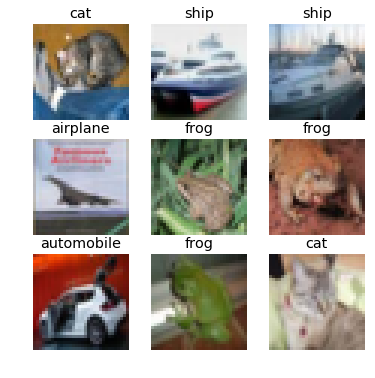

In [6]:
fig = plt.figure(figsize=(6,6))
for i in range(0, 9):
    ax = fig.add_subplot(330 + 1 + i)
    plt.imshow(Image.fromarray(X_test[i]))
    ax.set_title(labelNames[y_test[i]])
    ax.axis('off')
    
plt.show()

### Scaling the Data 
When dealing with numeric features, we have specific attributes, which may be completely unbounded in nature, like view counts of a video or web page hits. Using the raw values as input features might make models biased toward features having high magnitude values. It is still recommended to normalize and scale down the features, in our case, the images has a maximum of 255 pixels, then it is sufficient divide the dataset by 255.0 to normalize the data.

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Prepare the target variable
Remember there are 10 classes to work with and hence we are dealing with a multi-class classification problem, then we need performs one hot encoding of the labels.

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


### Data Augmentation
Keras provides the [ImageDataGenerator](https://keras.io/preprocessing/image/) class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

- Sample-wise standardization. 
- Feature-wise standardization.
- ZCA whitening.
- Random rotation, shifts, shear and flips.
- Dimension reordering.
- Save augmented images to disk.

Rather than performing the operations on your entire image dataset in memory, the API is designed to generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). This reduces your memory overhead, but adds some additional time cost during model training.

After you have created and configured your ImageDataGenerator, you must fit it on your data. This will calculate any statistics required to actually perform the transforms to your image data.

It is also possible to standardize pixel values across the entire dataset. This is called feature standardization and mirrors the type of standardization often performed for each column in a tabular dataset. You can perform feature standardization by setting the ***featurewise_center*** and ***featurewise_std_normalization*** parameters as ***True***. Since these is the default and we already  made our standarization manualy divide the pixels by 256.0 we set this parameters to0 ***False***.

A whitening transform of an image is a linear algebra operation that reduces the redundancy in the matrix of pixel images. Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm. To do this, ZCA shows better results than PCA and results in transformed images that keeps all of the original dimensions and unlike PCA, resulting transformed images still look like their originals.

Sometimes images in your sample data may have varying and different rotations in the scene, then add a randomly rotating might be of help when learning from photographs or where the objects may have different orientations. See that we train your model to better handle rotations of images by artificially and 15 degrees randomly rotating images from our dataset during training.

You can make a same consideration respect of the position, since objects in your images may not be centered in the frame. They may be off-center in a variety of different ways. You can train your deep learning network to expect and currently handle off-center objects by artificially creating shifted versions of your training data. In our model we do that by width_shift_range and height_shift_range set as 0.1.

Another augmentation to your image data that can improve performance on large and complex problems is to create random flips of images in your training data. See that I prefer only make a horizontal flip. 

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train)

### Set Global Variables and Seed

In [10]:
num_classes = 10
input_shape = (32, 32, 3)
kernel = (3, 3)

# fix random seed for reproducibility 
seed = 101
np.random.seed(seed)

Now that we have training and test datasets normalized and the labels converted, the next step is to build the CNN model. 

##  Image Multiclassifier using CNNs from scratch
Our task here is to build a  image multiclassifier using CNNs from scratch, that can identify the correct class label of a given image. 

### Create the CNN Model
Since we have two dimensional images (the third dimension is the channel information), we will be using Conv2D layers. The initial few conv layers of the model kind of work toward feature extraction while the last couple of layers (fully connected) help in classifying the data.

In [11]:
model = Sequential()
model.add(Conv2D(64, kernel_size=kernel, activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=kernel, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

### Visualize the network architecture
We can actually visualize this network architecture using the following code snippet to understand the layers that have been used in this network, in a better way. 

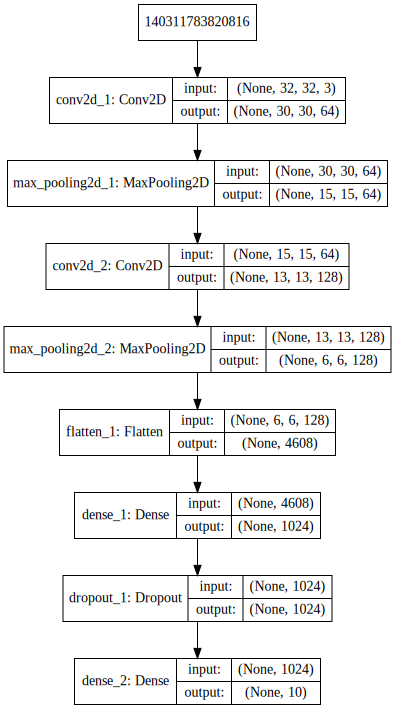

In [12]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

The next step involves compiling. We use categorical_crossentropy as our loss function since we are dealing with multiple classes. Besides this, we use the Adadelta optimizer and then train the classifier on the training data. 

In [13]:
#training
batch_size = 50
epochs = 75
lrate = 0.1
epsilon=1e-08
decay=1e-4
#optimizer = keras.optimizers.rmsprop(lr=lrate,decay=1e-4)
optimizer = keras.optimizers.Adadelta(lr=lrate ) #, epsilon=epsilon, decay=decay)
#optimizer = keras.optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=epsilon, decay=decay)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Instead of calling the fit() function on our model, we must call the fit_generator() function and pass in the data generator and the desired length of an epoch as well as the total number of epochs on which to train. We will fit the model by 70 epochs and save the results in a history variable to can be plot and see the evolution by each epoch.

In [14]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs, verbose=1,
                    validation_data=(X_test,y_test))

Epoch 1/75
1000/1000 [==============================] - 41s 41ms/step - loss: 1.7859 - acc: 0.3537 - val_loss: 1.9417 - val_acc: 0.2947
Epoch 2/75
1000/1000 [==============================] - 36s 36ms/step - loss: 1.4891 - acc: 0.4627 - val_loss: 1.7365 - val_acc: 0.3655
Epoch 3/75
1000/1000 [==============================] - 35s 35ms/step - loss: 1.3856 - acc: 0.5052 - val_loss: 1.5673 - val_acc: 0.4278
Epoch 4/75
1000/1000 [==============================] - 35s 35ms/step - loss: 1.3059 - acc: 0.5366 - val_loss: 1.5097 - val_acc: 0.4563
Epoch 5/75
1000/1000 [==============================] - 36s 36ms/step - loss: 1.2475 - acc: 0.5583 - val_loss: 1.3350 - val_acc: 0.5283
Epoch 6/75
1000/1000 [==============================] - 36s 36ms/step - loss: 1.1951 - acc: 0.5782 - val_loss: 1.3859 - val_acc: 0.5111
Epoch 7/75
1000/1000 [==============================] - 35s 35ms/step - loss: 1.1532 - acc: 0.5920 - val_loss: 1.2752 - val_acc: 0.5454
Epoch 8/75
1000/1000 [==========================

Epoch 61/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.6325 - acc: 0.7827 - val_loss: 0.8368 - val_acc: 0.7244
Epoch 62/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.6303 - acc: 0.7835 - val_loss: 0.9498 - val_acc: 0.6908
Epoch 63/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.6298 - acc: 0.7832 - val_loss: 0.8349 - val_acc: 0.7255
Epoch 64/75
1000/1000 [==============================] - 35s 35ms/step - loss: 0.6230 - acc: 0.7878 - val_loss: 0.8622 - val_acc: 0.7107
Epoch 65/75
1000/1000 [==============================] - 37s 37ms/step - loss: 0.6163 - acc: 0.7885 - val_loss: 0.8406 - val_acc: 0.7249
Epoch 66/75
1000/1000 [==============================] - 36s 36ms/step - loss: 0.6133 - acc: 0.7902 - val_loss: 0.8769 - val_acc: 0.7114
Epoch 67/75
1000/1000 [==============================] - 35s 35ms/step - loss: 0.6164 - acc: 0.7896 - val_loss: 0.8617 - val_acc: 0.7234
Epoch 68/75
1000/1000 [==================

From the preceding output, you can see that this takes close to a one minute on a GPU, the performance decreases by 10 in CPU, anywhere between 200-600 seconds. Any way, you notice that it is too expensive process, and you need observe their history of gain to decide if continue or abort to change some parameters. 

Let's see the graph with the results through the epochs interactions.

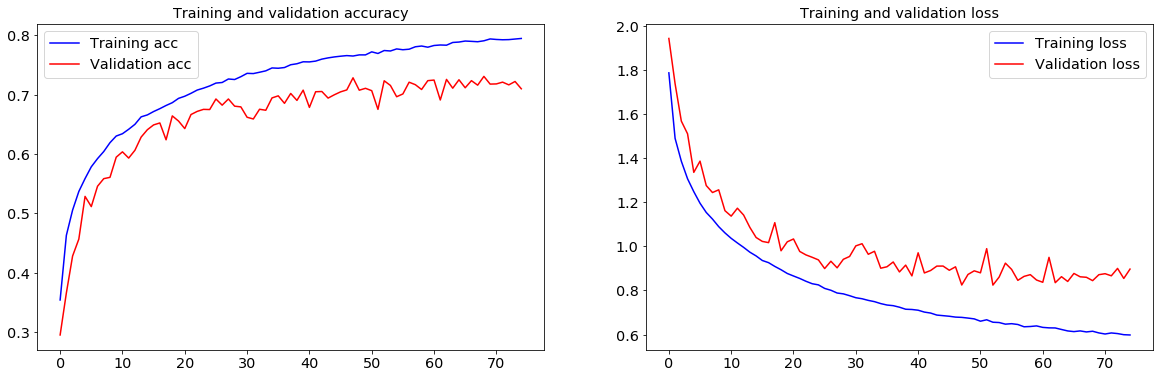

In [15]:
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epoch = range(epochs)

    fig = plt.figure(figsize=(20,6))
    ax1 = fig.add_subplot(121)
    plt.plot(epoch, acc, 'b', label='Training acc')
    plt.plot(epoch, val_acc, 'r', label='Validation acc')
    ax1.set_title('Training and validation accuracy')
    ax1.legend()

    ax2 = fig.add_subplot(122) 
    plt.plot(epoch, loss, 'b', label='Training loss')
    plt.plot(epoch, val_loss, 'r', label='Validation loss')
    ax2.set_title('Training and validation loss')
    ax2.legend()

    plt.show()

plot_results(history)

### Final evaluation of the model
Let's see the performance of model against the test dataset.

In [16]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print("Test Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 113us/step
Test loss: 0.8965954562187195
Test Accuracy: 70.97%


In [17]:
#Saving the model
model.save('cifar10_1')

### Predict class of image in practice
We select a one record from test dataset, it shows an image looks like a automobile and the model correctly identifies the same as depicted in this snippet.

Actual label: automobile
Input image shape: (1, 32, 32, 3)
Predict Label: cat

Predict Probability:
 [[0.0079218  0.2942507  0.02521501 0.39705598 0.0196437  0.00455324
  0.01179984 0.00487361 0.05986109 0.17482501]]


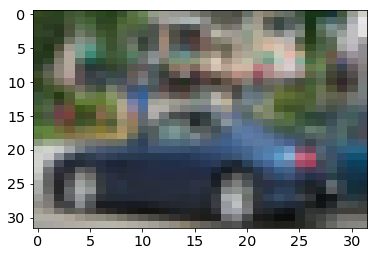

In [18]:
# How CNN Classifies an Image?
img_idx = 122
plt.imshow(X_test[img_idx],aspect='auto')
print('Actual label:', labelNames[np.argmax(y_test[img_idx])])
# Preper image to predict
test_image =np.expand_dims(X_test[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',labelNames[model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', model.predict_proba(test_image,batch_size=1))

### Model Interpretation
As we do in a regular classification or regression tasks, it is interesting try to evaluate how our model do the work. In the regular tasks, we use some methods like feature importance, coefficients, p-values, and so on. Thus, it would be interesting to see how the image data is manipulated by the conv-net we just created, but how? Luckily, keras provides hooks to extract information at intermediate steps in the model. They depict how various regions of the image activate the conv layers and how the corresponding feature representations and patterns are extracted.

Let's see it in our model, use the test record predict before to extract and view the activation maps of the image based on what representations are learned and extracted by the conv layers using the get_activations(...) and display_activations(...) functions in the notebook. 

In [19]:
# Utility Methods to understand CNN
# https://github.com/fchollet/keras/issues/431
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [20]:
# https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt

    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        #plt.imshow(activations, interpolation='None', cmap='binary')
        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

----- activations -----
(1, 30, 30, 64)
(1, 15, 15, 64)
(1, 13, 13, 128)
(1, 6, 6, 128)
(1, 4608)
(1, 1024)
(1, 1024)
(1, 10)
Displaying activation map 0


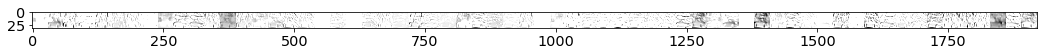

Displaying activation map 1


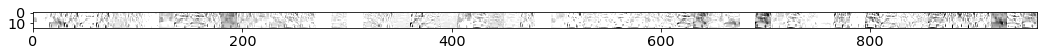

Displaying activation map 2


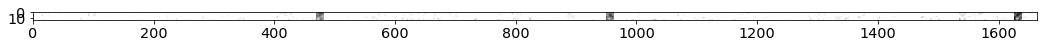

Displaying activation map 3


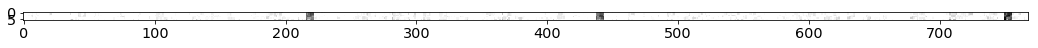

Displaying activation map 4


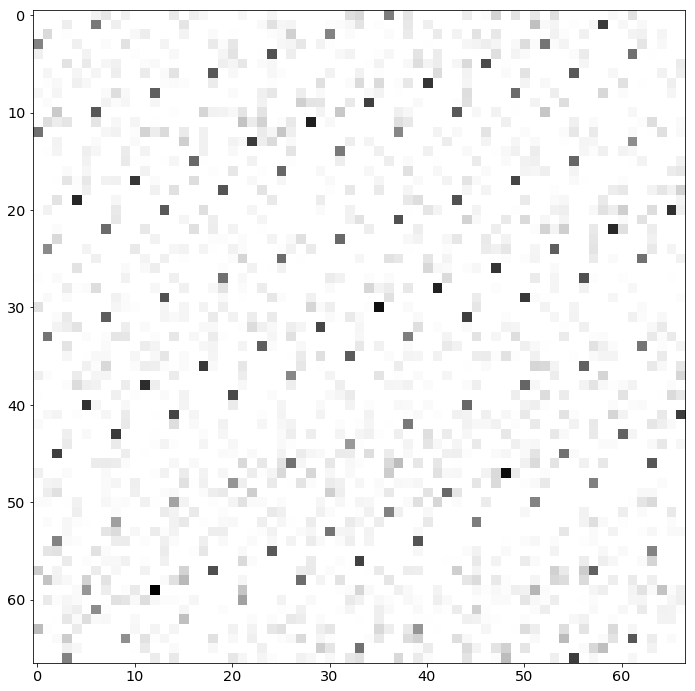

Displaying activation map 5


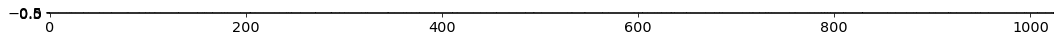

Displaying activation map 6


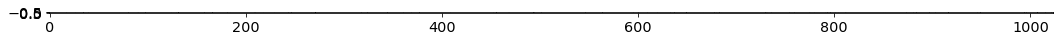

Displaying activation map 7


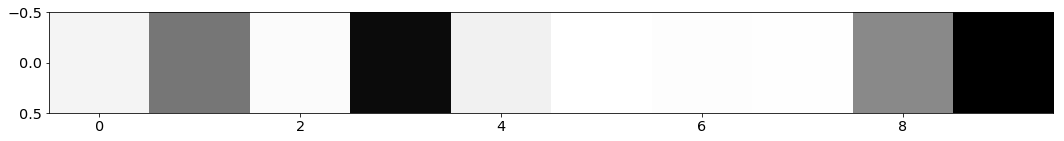

In [21]:
activations = get_activations(model, test_image)
display_activations(activations)

As you can see, in this case, it is possible to obtain a good results with a simple CNN, but it need some time to find the most adequate CNN architecture and the process is too much expensive.  So, let us go to see how we can get better results by make improvements on a pre-trained more complex models.

## CNN with Pre-Trained Models

Since obtaining large labeled datasets and training highly complex and deep neural networks is a time consuming task  In practice, we utilize a concept, what is formally termed as transfer learning. This concept of transfer learning helps us leverage existing models for our tasks. The core idea is to leverage the learning, which the model learned from being trained over a large dataset and then transfer this learning by re-using the same model to extract feature representations from new images.  There are many  models have deep and complex architectures that have been fine-tuned and trained over diverse, large datasets. Hence, these models have been proven to have amazing performance on complex object recognition tasks.

There are several strategies of performing transfer learning, the mains are:
- ***Pre-trained model as feature extractor***: Since the main objective of convolutions and pooling layers are extract features from the data-set, we ca use the pre-trained model is used to extract features for our dataset. We build a fully connected classifier on top of these features. In this case we only need to train the fully connected classifier, which does not take much time.
- ***Fine-tuning pre-trained models***: It is possible to fine-tune an existing pre-trained model by fixing some of the layers and allowing others to learn/update weights apart from the fully connected layers. Usually it is observed that initial layers capture generic features while the deeper ones become more specific in terms of feature extraction. Thus, depending upon the requirements, we fix certain layers and fine-tune the rest.

As a rule of thumb, when we have a small training set and our problem is similar to the task for which the pre-trained models were trained, we can use transfer learning. If we have enough data, we can try and tweak the convolutional layers so that they learn more robust features relevant to our problem.

Next we will utilize a pre-trained conv-network as a fine-tuning pre-trained models and build fully connected layer based classifier on top of it and train the model to help us build a classifier on CIFAR10 dataset. 

For do this, we will use the VGG-19 model from the Visual Geometry Group of the Oxford University is one state-of-the-art convolutional neural network. This has been shown to perform extremely well on various benchmarks and competitions. VGG19 is a 19-layer conv-net trained on ImageNet dataset. ImageNet is visual database of hand-annotated images amounting to 10 million spanning across 9,000+ categories.

Since we would be using VGG-19 for fine-tuning, we do not need the top (or fully connected) layers of this model. keras makes this as simple as setting the include_top parameter to False. The following snippet loads the VGG-19 model architecture consisting of the conv layers and leaves out the fully connected layers

In [22]:
vgg_model = applications.VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
display(vgg_model.summary())
bottleneck_path = r'../working/bottleneck_features_train_vgg19.npy'

80142336/80134624 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool

None

In this case, we only need to train the fully connected classifier and the last level of the VGG model, and then we need set to False all others trainable layers of VGG. Note, if you want make some tuning, you can choice some of VGG layer to be training too.

In [23]:
# Set to false the layers except the last set of conv laer and their pooling
for layer in vgg_model.layers[:-5]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f9cd86552e8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd86631d0> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd86639b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cd86770b8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd86775f8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd8387278> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cd83a6630> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd83a64a8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd8348e10> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd83060b8> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd8325710> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9cd82ca048> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd82ca978> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd8289358> False
<keras.layers.convolutional.Conv2D object at 0x7f9cd82a97b8>

### Create The Model by a Pre-Trained Model 
Let' create our model, include the VGG in the starting with and add the new fully connected layers and the classification.

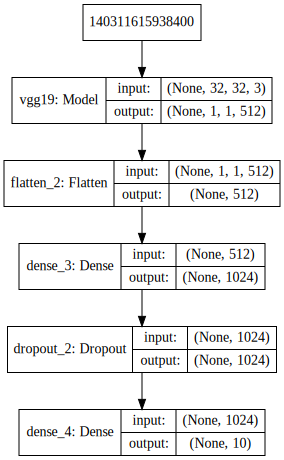

In [24]:
# fix random seed for reproducibility
seed = 101
np.random.seed(seed)

# Create the model
clf_model = Sequential()
 
# Add the vgg convolutional base model
#clf_model.add(Flatten(input_shape=bottleneck_features_train.shape[1:]))
clf_model.add(vgg_model)

# Add new layers
clf_model.add(Flatten())
clf_model.add(Dense(1024, activation='relu'))
clf_model.add(Dropout(0.5))
clf_model.add(Dense(num_classes, activation='softmax'))

SVG(model_to_dot(clf_model, show_shapes=True, show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

We will fit the model by 75 epochs and save the results in a history variable to can be plot and see the evolution by each epoch.

In [25]:
#training
batch_size = 50
epochs = 75
lrate = 0.1
epsilon=1e-08
decay=1e-4
#opt_rms = optimizers.rmsprop(lr=lrate,decay=1e-4)
optimizer = keras.optimizers.Adadelta(lr=lrate ) # decay=decay) #, epsilon=epsilon, 
#optimizer = keras.optimizers.Adam(lr=lrate, beta_1=0.9, beta_2=0.999, epsilon=epsilon, decay=decay)

clf_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = clf_model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs, verbose=1,
                    validation_data=(X_test,y_test))
#history = clf_model.fit(bottleneck_features_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/75
1000/1000 [==============================] - 69s 69ms/step - loss: 1.2661 - acc: 0.5597 - val_loss: 1.0118 - val_acc: 0.6465
Epoch 2/75
1000/1000 [==============================] - 66s 66ms/step - loss: 0.9666 - acc: 0.6667 - val_loss: 0.8702 - val_acc: 0.6976
Epoch 3/75
1000/1000 [==============================] - 66s 66ms/step - loss: 0.8846 - acc: 0.6934 - val_loss: 0.8496 - val_acc: 0.7071
Epoch 4/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.8220 - acc: 0.7146 - val_loss: 0.9149 - val_acc: 0.6932
Epoch 5/75
1000/1000 [==============================] - 66s 66ms/step - loss: 0.7748 - acc: 0.7298 - val_loss: 0.8150 - val_acc: 0.7193
Epoch 6/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.7334 - acc: 0.7437 - val_loss: 0.8442 - val_acc: 0.7155
Epoch 7/75
1000/1000 [==============================] - 66s 66ms/step - loss: 0.7022 - acc: 0.7559 - val_loss: 0.7684 - val_acc: 0.7401
Epoch 8/75
1000/1000 [==========================

Epoch 61/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1551 - acc: 0.9496 - val_loss: 1.3337 - val_acc: 0.7478
Epoch 62/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1518 - acc: 0.9515 - val_loss: 1.3034 - val_acc: 0.7453
Epoch 63/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1492 - acc: 0.9539 - val_loss: 1.3385 - val_acc: 0.7468
Epoch 64/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1489 - acc: 0.9524 - val_loss: 1.2244 - val_acc: 0.7561
Epoch 65/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1497 - acc: 0.9524 - val_loss: 1.4595 - val_acc: 0.7349
Epoch 66/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1418 - acc: 0.9547 - val_loss: 1.2124 - val_acc: 0.7406
Epoch 67/75
1000/1000 [==============================] - 67s 67ms/step - loss: 0.1424 - acc: 0.9562 - val_loss: 1.4575 - val_acc: 0.7336
Epoch 68/75
1000/1000 [==================

From the preceding output, you can see that this takes close to 45 seconds on a GPU, an improvement of only 15 seconds, but to training a more complex model.

Let's see the graph with the results through each epoch interactions.

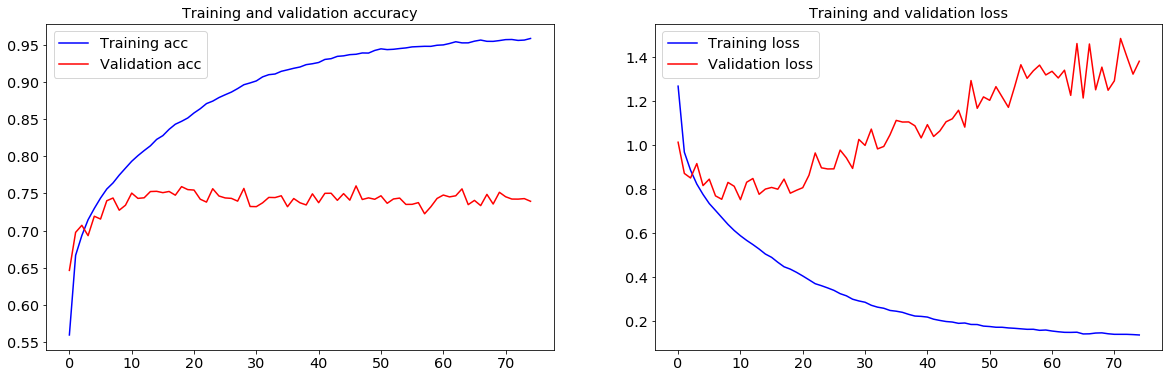

In [26]:
plot_results(history)

### Final evaluation of the model
Let's see the performance of model against the test dataset.

In [27]:
scores = clf_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print("Test Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 7s 694us/step
Test loss: 1.3792618572235107
Test Accuracy: 73.94%


### Predict class of image in CNN Pre-Trained Classifier
We select a one record from test dataset, it shows an image looks like a horse and the model correctly identifies the same as depicted in this snippet.

Actual label: horse
Input image shape: (1, 32, 32, 3)
Predict Label: horse

Predict Probability:
 [[1.13051495e-11 8.96555321e-15 6.59041131e-16 1.60686893e-14
  2.14775078e-08 3.48511463e-11 2.96423902e-15 1.00000000e+00
  3.56363807e-16 5.37711965e-13]]


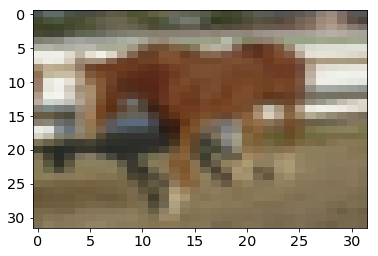

In [28]:
img_idx = 177
plt.imshow(X_test[img_idx],aspect='auto')
print('Actual label:', labelNames[np.argmax(y_test[img_idx])])
# Preper image to predict
test_image =np.expand_dims(X_test[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',labelNames[clf_model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', clf_model.predict_proba(test_image,batch_size=1))

Our model achieved good accuracy in the training data, but it shows some overfit, since it lose too much accuracy in the validation and test. Therefore, we need work on tuning parameter, change some VGG layer to learnable, change the fully connected layer. and/or increase the number of epochs.

The task of fine-tuning a network is to tweak the parameters of an already trained network so that it adapts to the new task at hand. In general, the initial layers learn very general features and as we go higher up the network, the layers tend to learn patterns more specific to the task it is being trained on. Thus, for fine-tuning, we want to keep the initial layers intact and retrain the later layers for our task.

## Conclusion

Therefore, we saw the power, advantages, and disadvantages of transfer learning. The main advantage is instead of spending time reinventing the wheel, with a few lines of code, we were able to leverage state of the art neural network for our classification task. In the other hand, you have more control on the scratch approach, and in the case of the transfer you continue need work on tuning.